In [1]:
%pip install stardist
%pip install imagecodecs
%pip install numpy
%pip install matplotlib
%pip install csbdeep
%pip install pandas
%pip install seaborn
%pip install tensorflow
%pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\Zsombi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\Zsombi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\Zsombi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\Zsombi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\Zsombi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\Zsombi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\Zsombi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\Zsombi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\Zsombi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Importing the .svs files using csbdeep

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from tifffile import imread, imsave
from csbdeep.utils import Path, normalize
from csbdeep.utils.tf import keras_import
keras = keras_import()

from stardist import export_imagej_rois, random_label_cmap
from stardist.models import StarDist2D

np.random.seed(0)
cmap = random_label_cmap()


In [3]:
def show_image(img, **kwargs):
    fig, ax = plt.subplots(2,4, figsize=(16,8))
    mid = [s//2+600 for s in img.shape[:2]]
    for a,t,u in zip(ax.ravel(),[1,2,4,8,16,32,64,128],[16,8,4,2,1,1,1,1]):
        sl = tuple(slice(c-s//t//2, c+s//t//2, u) for s,c in zip(img.shape[:2], mid))
        a.imshow(img[sl], **kwargs)
        a.axis('off')
    plt.tight_layout()
    plt.show()

In [4]:
img = imread('data/MSB-00643-03-12.svs')

In [5]:
img.shape

(11823, 23903, 3)

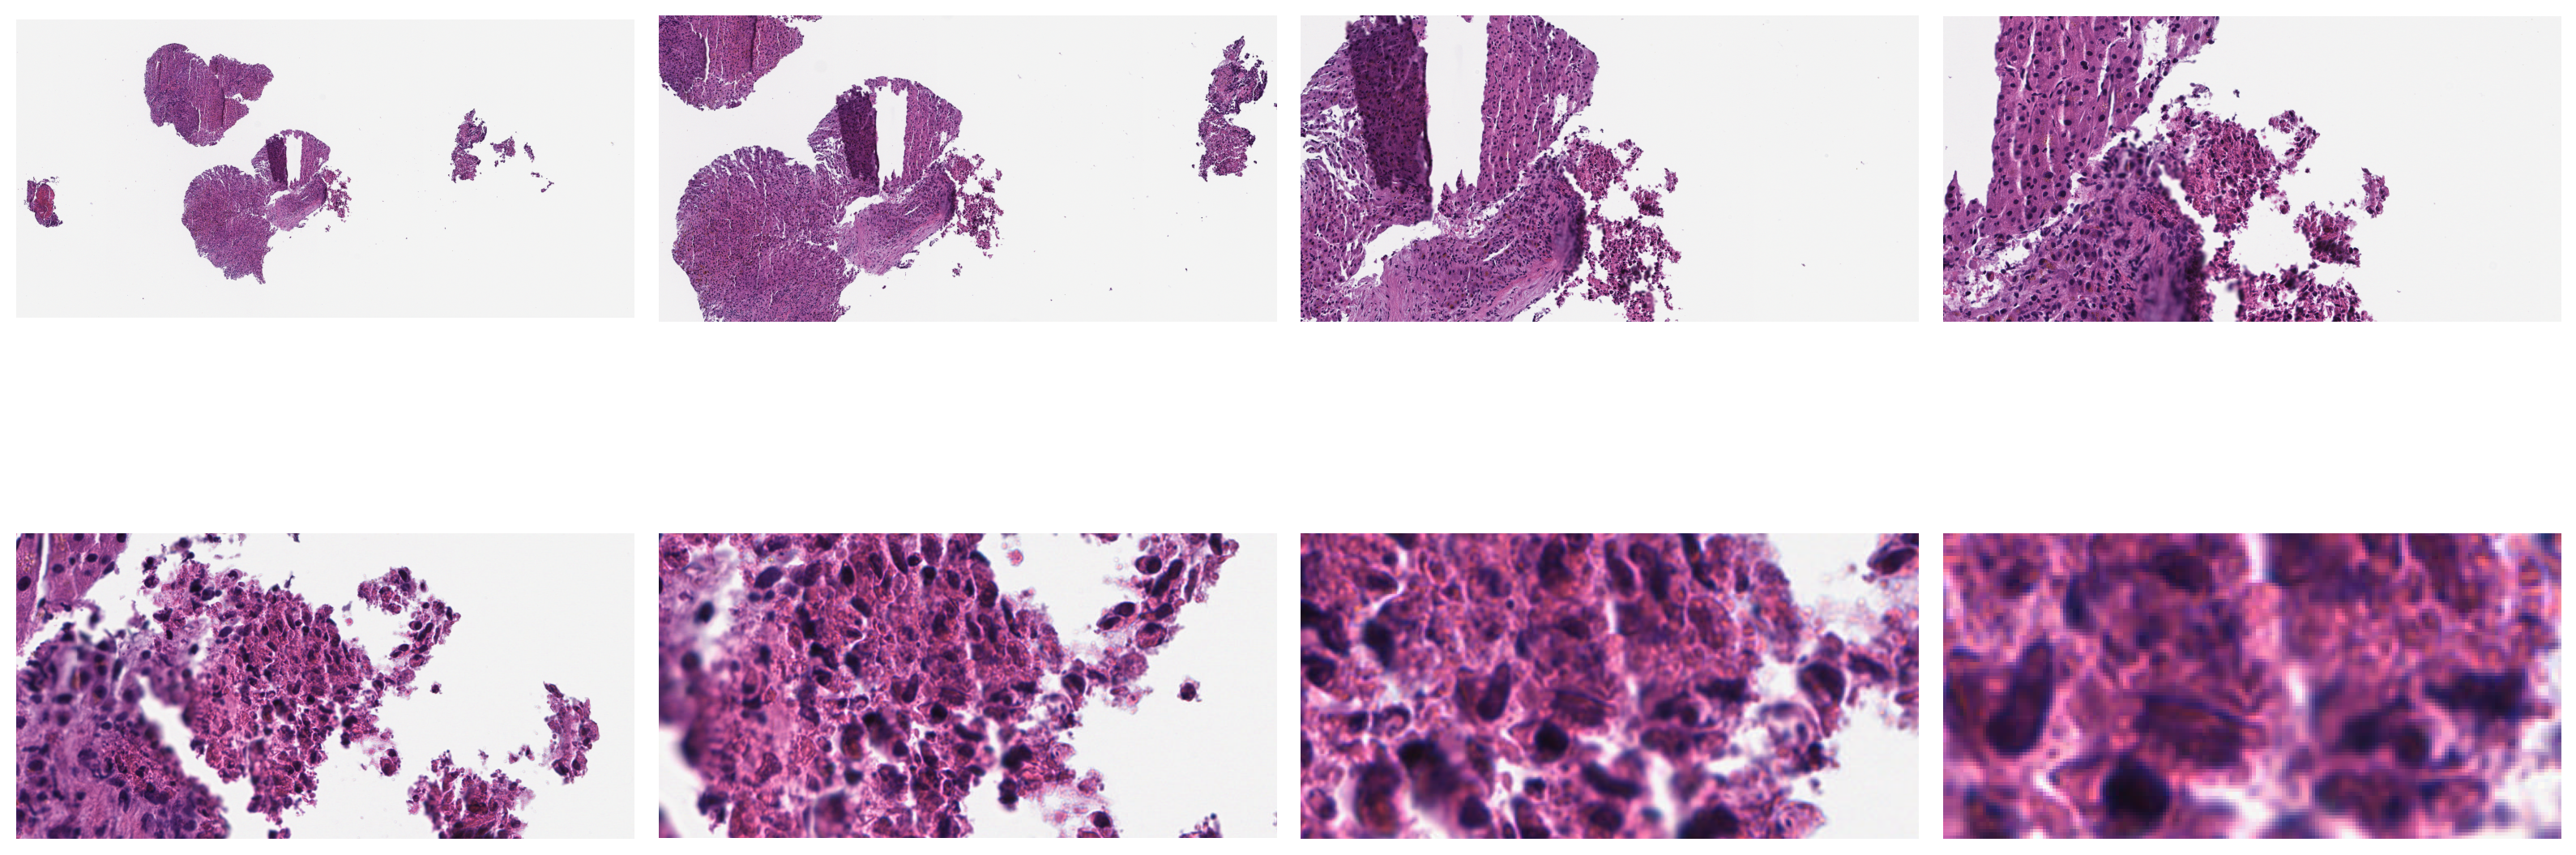

In [6]:
show_image(img)

# Segmentation using StarDist2D pre trained model for baseline

https://stardist.net

https://github.com/stardist/stardist/

In [7]:
model = StarDist2D.from_pretrained("2D_versatile_he")

Found model '2D_versatile_he' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.692478, nms_thresh=0.3.


In [8]:
from csbdeep.data import Normalizer, normalize_mi_ma

class Scale_Norm(Normalizer):
    def __init__(self, mi, ma):
        self.mi, self.ma = mi, ma
    def before(self, x, axes):
        return normalize_mi_ma(x, self.mi, self.ma, dtype=np.float32)
    def after(*args, **kwargs):
        assert False
    @property
    def do_after(self):
        return False
    


mi, ma = 0, 255
normalizer = Scale_Norm(mi,ma)

In [9]:
labels, palys = model.predict_instances_big(img, axes='YXC', block_size=4096, min_overlap=128, context=128, normalizer=normalizer, n_tiles=(4,4,1))

effective: block_size=(4096, 4096, 3), min_overlap=(128, 128, 0), context=(128, 128, 0)


100%|██████████| 28/28 [02:16<00:00,  4.89s/it]


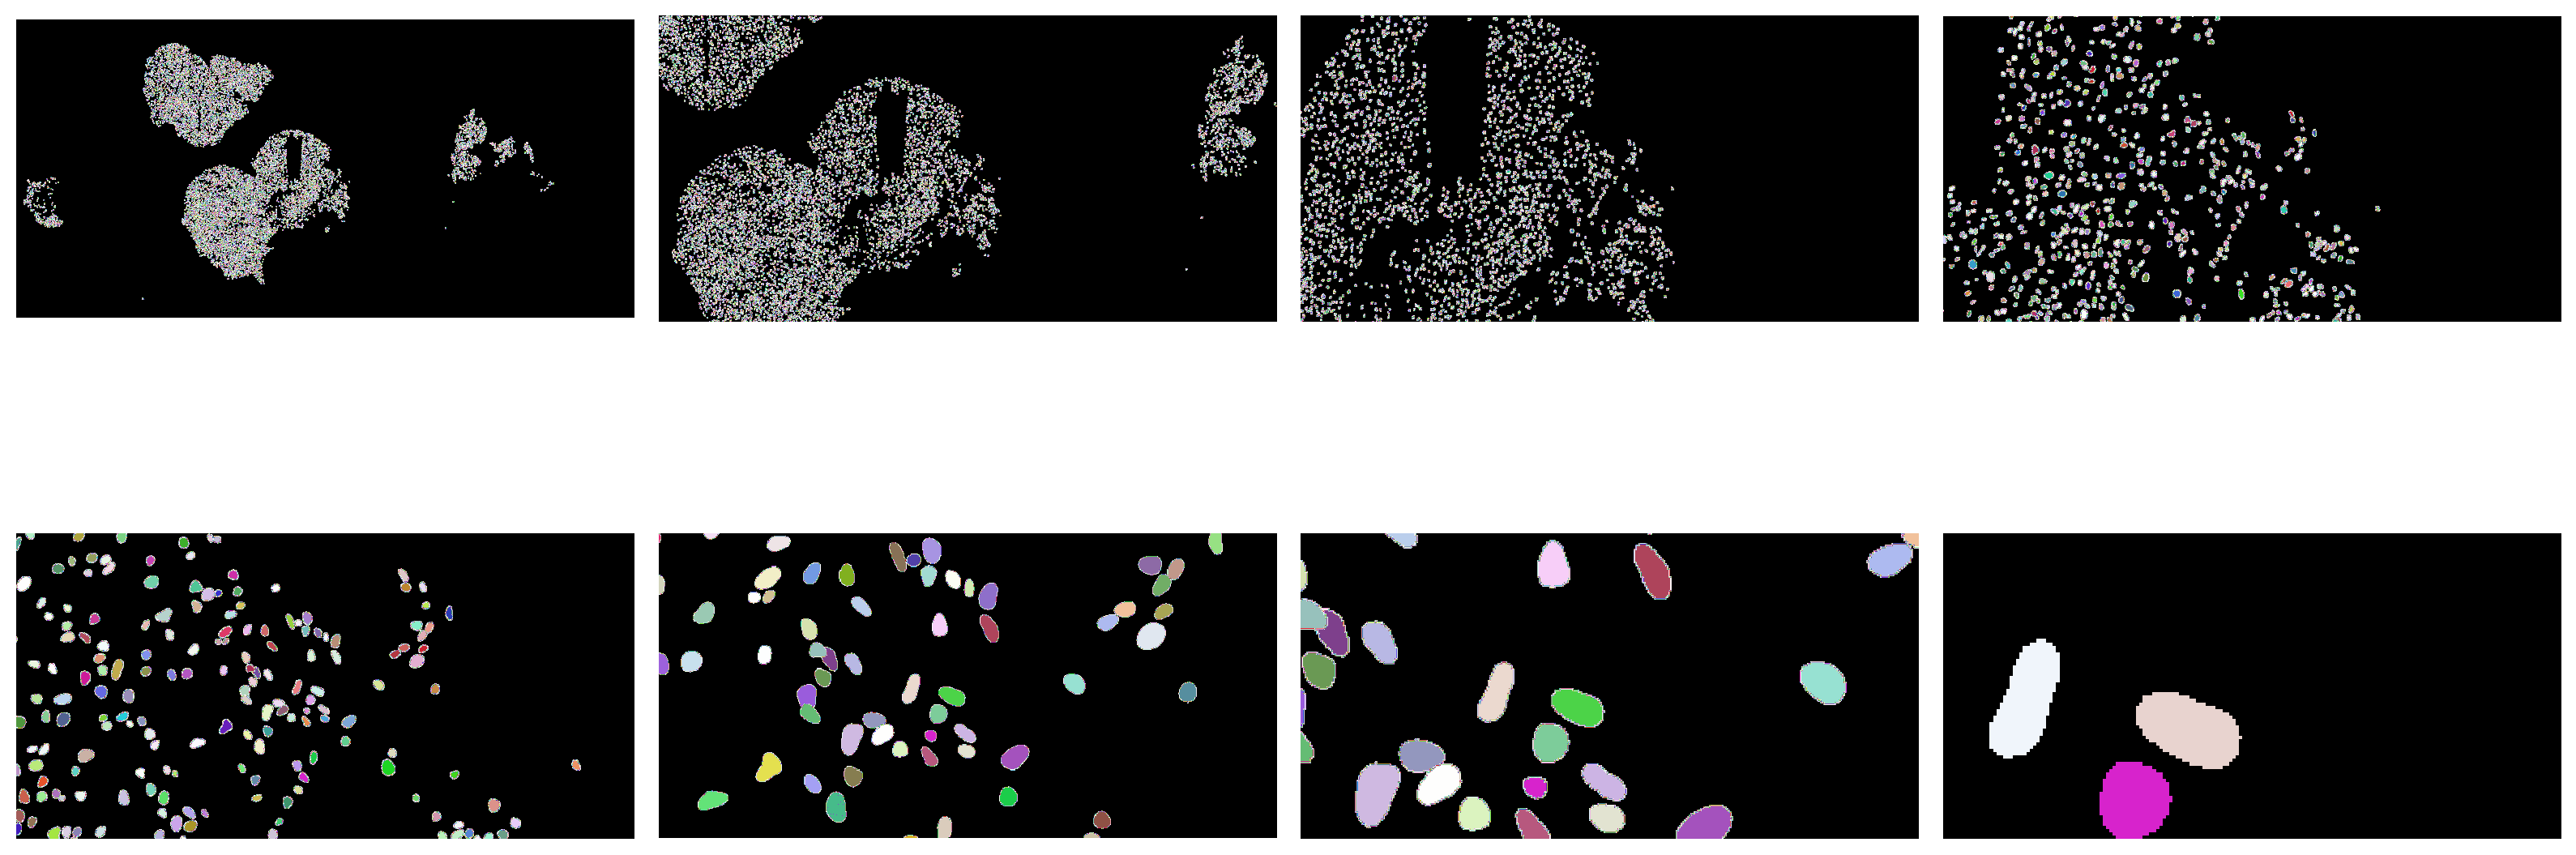

In [10]:
show_image(labels,cmap=cmap)

In [11]:
from skimage.measure import regionprops_table
import pandas as pd

props = regionprops_table(labels, img, properties=["label", "area", "equivalent_diameter", "mean_intensity", "solidity"])

In [12]:
analysis_res = pd.DataFrame(props)
print(analysis_res.tail())

       label   area  equivalent_diameter  mean_intensity-0  mean_intensity-1  \
11854  11855  335.0            20.652730         79.143284         47.355224   
11855  11856  487.0            24.901158         52.006160         29.078029   
11856  11857  364.0            21.528102         88.857143         59.291209   
11857  11858  122.0            12.463355         67.942623         34.852459   
11858  11859  308.0            19.802974         54.831169         37.451299   

       mean_intensity-2  solidity  
11854        108.600000  0.968208  
11855         70.531828  0.962451  
11856        124.101648  0.962963  
11857         96.081967  0.945736  
11858         88.935065  0.941896  


<Axes: xlabel='area', ylabel='Count'>

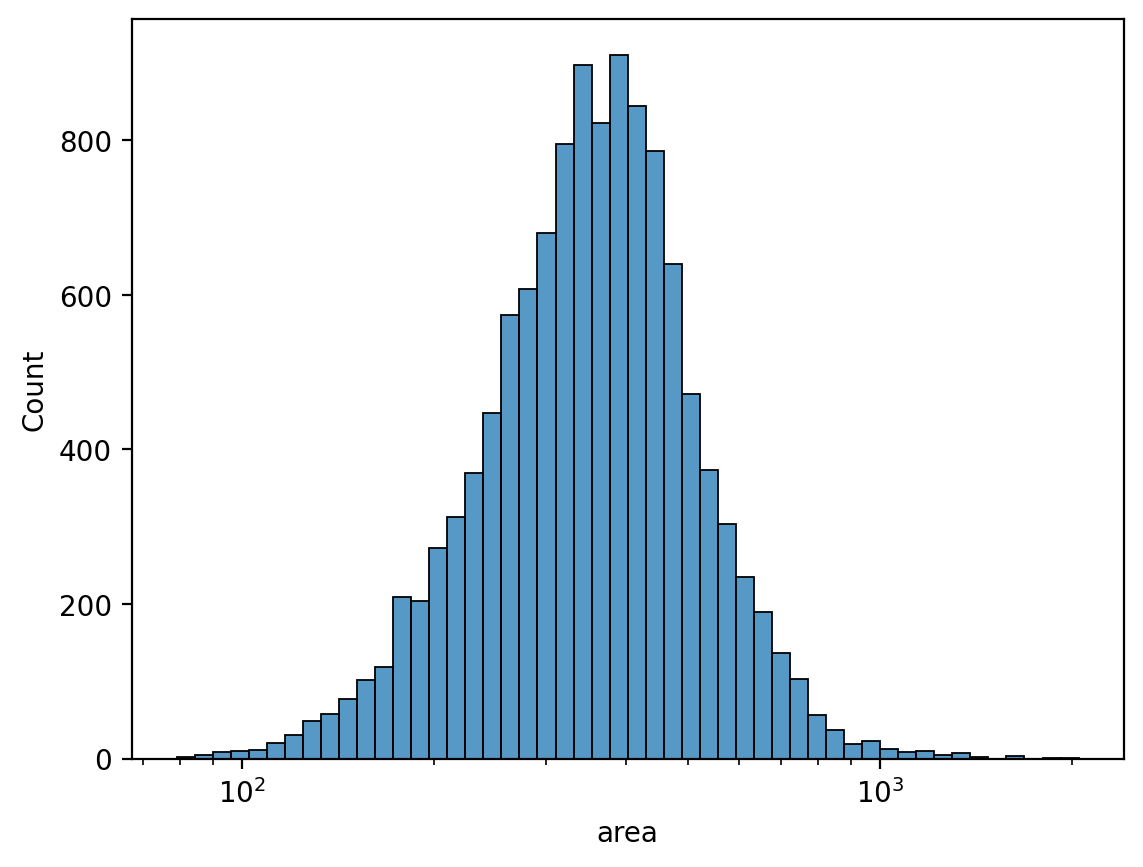

In [13]:
import seaborn as sns

sns.histplot(x="area", data=analysis_res, bins=50, log_scale=True)